### Analysing live data using CURE
Below applies CURE clustering to static data, producing a table with the desired number of clusters and representative points. These representative points are used to classify new live data, which is fed in from a separate q process running the script `load.q`.

### Dependencies
To run the below notebook, the following dependencies are required.
```
- embedPy
- matplotlib
```

In [1]:
\l clust.q
plt:.p.import`matplotlib.pyplot

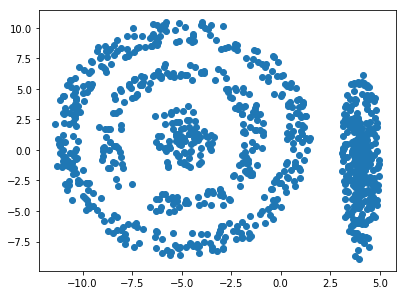

In [5]:
\S 42
dp:1000
dsc:{(y+x?z-y)*/:(cos;sin)@\:4*x?acos 0}
d :flip(-5 1)+(1 1.5)*dsc[1000;0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
d,:flip(4 -1)+(1 8)*dsc[4000;0;1.]
d@:neg[dp&count d]?count d
plt[`:scatter][;]. flip d;
plt[`:show][];

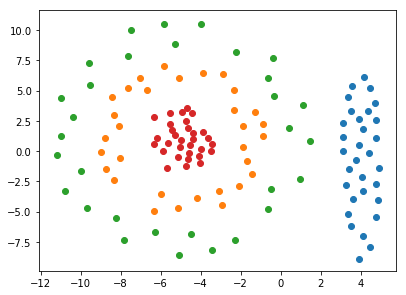

In [6]:
/.clust.cure[data;n clust;dist;n reps;comp;C code?;streaming?]
r:.clust.cure[d;4;`e2dist;30;0;0b;1b]
{plt[`:scatter][;]. flip x}each exec pts by clt from r where valid;
plt[`:show][];

In [7]:
/run `q load.q` as new process
\p 5001
show newpts:([]pts:();clt:`long$())
classify:{`newpts upsert .clust.clustnew[r;x;y]}

pts clt
-------


In [14]:
/new data fed in and classified every 5s
newpts

pts                clt
----------------------
3.927524  5.170911 207
5.159796  4.066642 207
1.780839  3.017723 795
7.85033   5.347096 207
7.111716  4.11597  207
4.931835  5.785203 207
0.8388858 1.959907 795
3.75638   6.137452 207
5.294808  6.916099 207
2.296615  6.919531 207
4.707883  6.346716 207
9.672398  2.306385 207
9.49975   4.39081  207
5.759051  5.919004 207
8.481567  3.89056  207


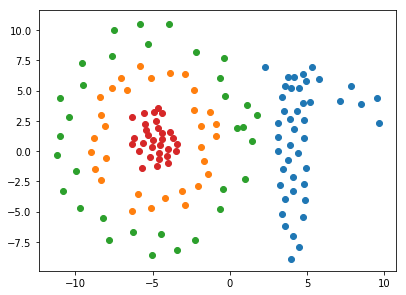

In [15]:
v:select from r where valid
{plt[`:scatter][;]. flip x}each {@[x;key y;,;value y]}.{exec pts by clt from x}each(v;newpts);
plt[`:show][];

----